<a href="https://colab.research.google.com/github/lokesh-061106/DL-Dog-VS-Cat-Classification/blob/main/DL_Dog_VS_Cat_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# installing the kaggle library
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle/
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing the Dog vs Cat Dataset from kaggle

In [ ]:
# Kaggle api
!kaggle competitions download -c dogs-vs-cats

 98% 795M/812M [00:11<00:00, 144MB/s]
100% 812M/812M [00:11<00:00, 71.8MB/s]


In [ ]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [ ]:
# extracting the compresed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
# extracting the compresed dataset
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images:', file_count)

Number of images: 25000


Printing the name of images

In [ ]:
file_names = os.listdir('/content/train')
print(file_names)

['dog.10351.jpg', 'cat.6809.jpg', 'cat.4197.jpg', 'dog.11899.jpg', 'cat.10562.jpg', 'cat.9464.jpg', 'cat.6531.jpg', 'dog.10259.jpg', 'dog.6288.jpg', 'cat.10406.jpg', 'cat.8876.jpg', 'cat.10974.jpg', 'dog.7189.jpg', 'cat.2506.jpg', 'dog.367.jpg', 'dog.10297.jpg', 'cat.6690.jpg', 'dog.949.jpg', 'cat.4022.jpg', 'dog.5298.jpg', 'cat.1459.jpg', 'dog.1501.jpg', 'cat.3050.jpg', 'dog.2947.jpg', 'dog.10003.jpg', 'cat.2080.jpg', 'cat.6897.jpg', 'cat.10026.jpg', 'dog.1913.jpg', 'dog.10830.jpg', 'dog.8279.jpg', 'dog.6907.jpg', 'dog.4242.jpg', 'cat.9194.jpg', 'cat.3753.jpg', 'dog.6794.jpg', 'dog.8674.jpg', 'dog.10957.jpg', 'cat.4803.jpg', 'dog.4934.jpg', 'dog.7317.jpg', 'cat.8165.jpg', 'cat.983.jpg', 'dog.2710.jpg', 'dog.3064.jpg', 'cat.2854.jpg', 'dog.5107.jpg', 'cat.4734.jpg', 'dog.7105.jpg', 'cat.11371.jpg', 'dog.2742.jpg', 'dog.7893.jpg', 'dog.8801.jpg', 'cat.9896.jpg', 'cat.9928.jpg', 'dog.4724.jpg', 'cat.10703.jpg', 'cat.3124.jpg', 'cat.11156.jpg', 'cat.218.jpg', 'cat.10191.jpg', 'cat.9520.jp

Import the Dependencies

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.pyplot as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Displaying the images of Dogs and Cats

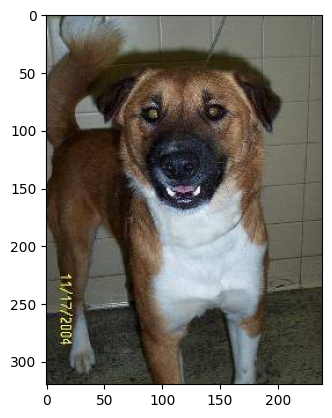

In [ ]:
# display dog image
img = mpimg.imread('/content/train/dog.11899.jpg')
imgplot = plt.imshow(img)
plt.show()

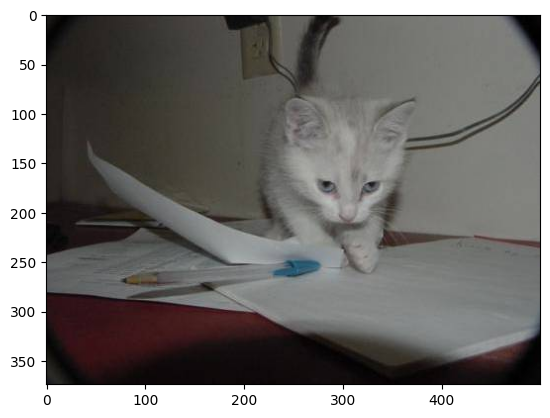

In [ ]:
# display cat image
img = mpimg.imread('/content/train/cat.10562.jpg')
imgplot = plt.imshow(img)
plt.show()

Resizing all the images

In [ ]:
file_names = os.listdir('/content/train')

for i in range(5):

  name = file_names[i]
  print(name[0:3])

dog
cat
cat
dog
cat


In [ ]:
file_names = os.listdir('/content/train')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  elif name == 'cat':
    cat_count += 1

print('Number of dog images:', dog_count)
print('Number of cat images:', cat_count)

Number of dog images: 12500
Number of cat images: 12500


Resizing all the images

In [ ]:
# creating all the directory for resized images
os.mkdir('/content/image_resized')


In [ ]:
original_folder = '/content/train/'
resized_folder = '/content/image_resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224,224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

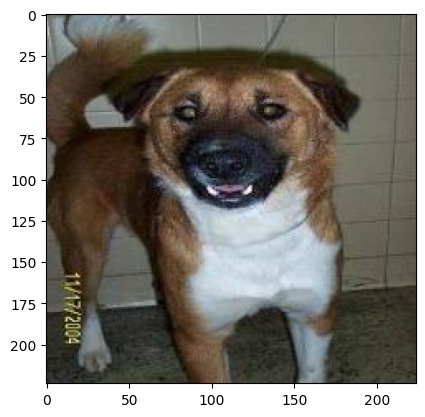

In [ ]:
# display resized dog image
img = mpimg.imread('/content/image_resized/dog.11899.jpg')
imgplot = plt.imshow(img)
plt.show()

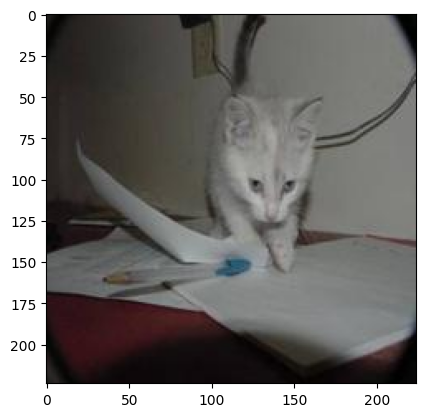

In [ ]:
# display cat image
img = mpimg.imread('/content/image_resized/cat.10562.jpg')
imgplot = plt.imshow(img)
plt.show()

Creating labels for resized images of dogs and cats

Cat --> 0

Dog --> 1

In [ ]:
# creating a for loop to assign labels
filenames = os.listdir('/content/image_resized/')

labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  elif label == 'cat':
    labels.append(0)


In [ ]:
print(filenames[0:5])
print(len(filenames))

['dog.10351.jpg', 'cat.6809.jpg', 'cat.4197.jpg', 'dog.11899.jpg', 'cat.10562.jpg']
2000


In [ ]:
print(labels[0:5])
print(len(labels))

[1, 0, 0, 1, 0]
2000


In [ ]:
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[1004  996]


Converting all the resized images to numpy arrays


In [ ]:
import cv2
import glob

In [ ]:
image_directory = '/content/image_resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [ ]:
print(dog_cat_images )

[[[[ 12  17  16]
   [ 11  16  15]
   [ 11  16  14]
   ...
   [122 124 124]
   [134 136 136]
   [144 146 146]]

  [[ 13  18  17]
   [ 14  19  18]
   [ 14  19  17]
   ...
   [115 117 117]
   [125 127 127]
   [132 134 134]]

  [[ 13  15  15]
   [ 15  17  17]
   [ 16  18  18]
   ...
   [108 110 110]
   [114 116 116]
   [118 120 120]]

  ...

  [[ 90  94 123]
   [ 90  94 123]
   [ 89  93 122]
   ...
   [134 129 120]
   [134 132 122]
   [136 134 124]]

  [[ 87  93 122]
   [ 87  93 122]
   [ 86  92 121]
   ...
   [132 127 118]
   [132 130 120]
   [134 132 122]]

  [[ 87  93 122]
   [ 87  93 122]
   [ 86  92 121]
   ...
   [130 125 116]
   [130 128 118]
   [132 130 120]]]


 [[[165 197 172]
   [185 217 192]
   [178 210 185]
   ...
   [199 206 221]
   [202 209 224]
   [194 201 216]]

  [[167 199 174]
   [165 200 174]
   [158 190 165]
   ...
   [203 210 225]
   [198 205 220]
   [186 193 208]]

  [[179 214 188]
   [160 197 171]
   [154 189 163]
   ...
   [213 220 235]
   [202 209 224]
   [190 197

In [ ]:
type(dog_cat_images)

numpy.ndarray

In [ ]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [ ]:
X = dog_cat_images
Y = np.asarray(labels)

Train Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


1600 --> training images

400  --> test images

In [ ]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [ ]:
print(X_train_scaled )

[[[[0.42352941 0.48235294 0.54509804]
   [0.41568627 0.4745098  0.5372549 ]
   [0.41176471 0.47058824 0.53333333]
   ...
   [0.63137255 0.68235294 0.7372549 ]
   [0.64313725 0.69411765 0.74901961]
   [0.6627451  0.71372549 0.76862745]]

  [[0.40392157 0.4627451  0.5254902 ]
   [0.39607843 0.45490196 0.51764706]
   [0.39215686 0.45098039 0.51372549]
   ...
   [0.58823529 0.63921569 0.69411765]
   [0.59607843 0.64705882 0.70196078]
   [0.61568627 0.66666667 0.72156863]]

  [[0.39607843 0.45490196 0.51764706]
   [0.39215686 0.45098039 0.51372549]
   [0.38823529 0.44705882 0.50980392]
   ...
   [0.58823529 0.63921569 0.69411765]
   [0.59607843 0.64705882 0.70196078]
   [0.61176471 0.6627451  0.71764706]]

  ...

  [[0.5254902  0.56862745 0.6       ]
   [0.5372549  0.58039216 0.61176471]
   [0.55294118 0.59607843 0.62745098]
   ...
   [0.39607843 0.44313725 0.45882353]
   [0.38431373 0.43137255 0.44705882]
   [0.38039216 0.42745098 0.44313725]]

  [[0.55294118 0.59607843 0.62745098]
   [0.5

Building the Neural Network

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Load pretrained MobileNetV2
base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

# Freeze pretrained layers
base_model.trainable = False

# Build model
x = base_model.output
x = GlobalAveragePooling2D()(x)
outputs = Dense(2, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=outputs)

model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_3[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,260,546 (8.62 MB)

 Trainable params: 2,562 (10.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
model.compile(
    optimizer='adam',
    loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [ ]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/backend/tensorflow/nn.py:717: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


50/50 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.7806 - loss: 0.4203
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.9753 - loss: 0.0861
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.9829 - loss: 0.0651
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.9851 - loss: 0.0462
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.9868 - loss: 0.0447


In [ ]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test score:', score)
print('Test accuracy:', acc)

/usr/local/lib/python3.12/dist-packages/keras/src/backend/tensorflow/nn.py:717: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


13/13 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.9848 - loss: 0.0395
Test score: 0.05231930688023567
Test accuracy: 0.9800000190734863


Predictive System

In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resized/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image is a cat')

elif input_pred_label == 1:
  print('The image is a dog')

